In [95]:
import numpy
import cv2
import matplotlib.pyplot as plt

In [96]:
def undistort(image):
    im = numpy.loadtxt('intrinsic.txt')
    dc = numpy.loadtxt('dist.txt')
    
    h,  w = image.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(im, dc, (w,h), 1, (w,h))
    x, y, w, h = roi
    return cv2.undistort(image, im, dc, None), cv2.undistort(image, newcameramtx, dc, None)

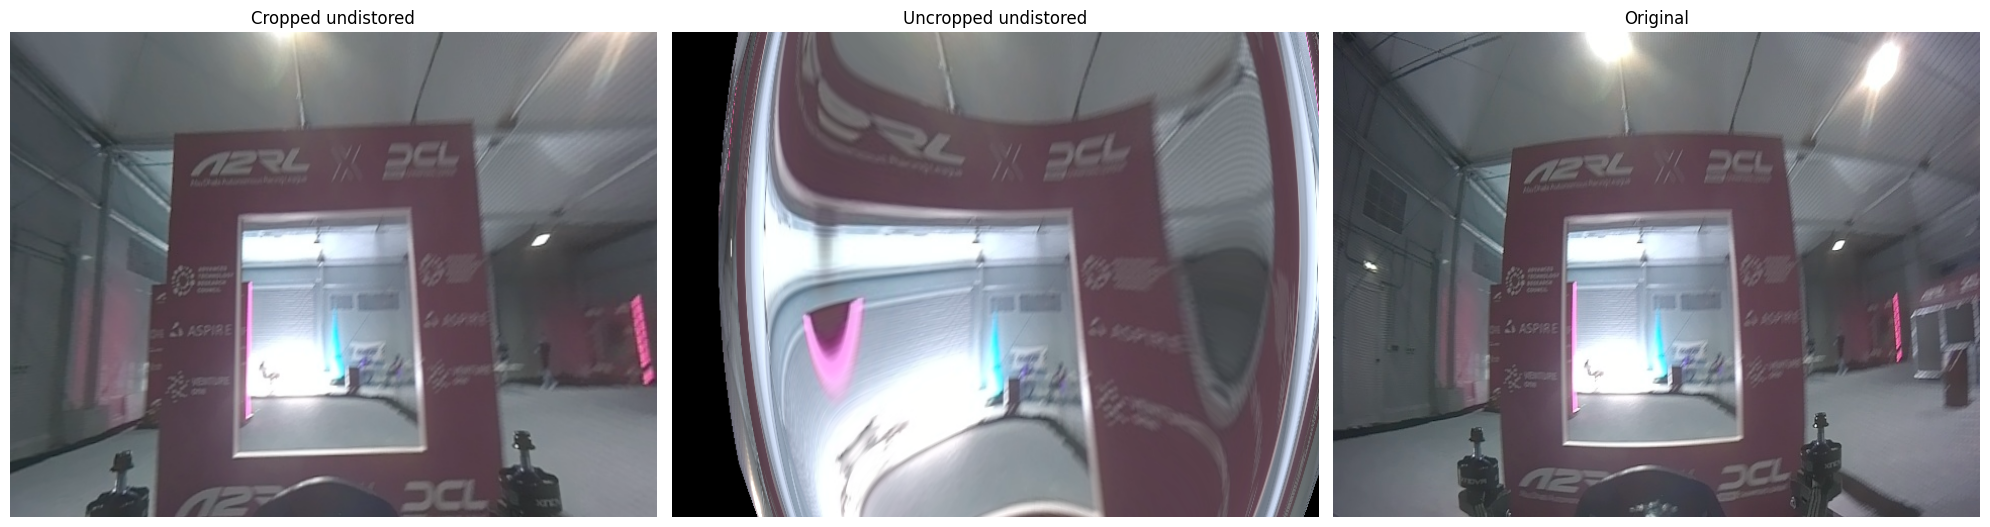

In [99]:
path = './res/1.jpg'
img1,img2 = undistort(cv2.imread(path))
img3 = cv2.imread(path)
plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Display the first image
plt.subplot(1, 3, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(img1)
plt.axis("off")  # Hide axes
plt.title("Cropped undistored")  # Add title

# Display the second image
plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(img2)
plt.axis("off")  # Hide axes
plt.title("Uncropped undistored")  # Add title

plt.subplot(1, 3, 3)  # 1 row, 2 columns, 2nd subplot
plt.imshow(img3)
plt.axis("off")  # Hide axes
plt.title("Original")  # Add title

# Show the plot
plt.tight_layout()  # Adjust spacing between images
plt.show()